# Lecture 16 K-means

## Basics of K-means

- Unsupervised machine learning algorithm
- identify clusters in your data (classification)

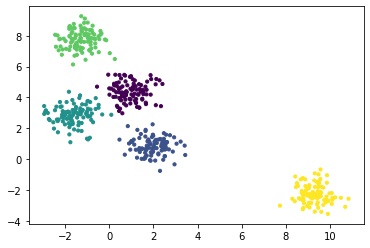

In [62]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=500, 
                  centers=5,
                  cluster_std=0.60,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=10);

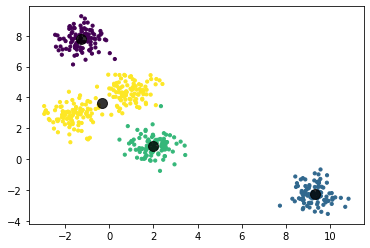

In [65]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.8);

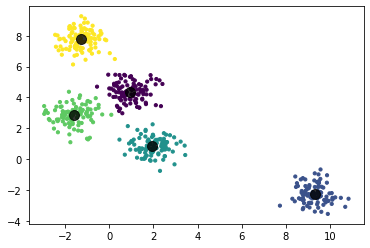

In [67]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.8);

## K-Means algorithm: Expectation–maximization
Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science. k-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here. In short, the expectation–maximization approach here consists of the following procedure:

- Guess some cluster centers
- Repeat until converged
    - E-Step: assign points to the nearest cluster center
    - M-Step: set the cluster centers to the mean
Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to. The "M-step" or "Maximization step" is so-named because it involves maximizing some fitness function that defines the location of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

https://www.nature.com/articles/nbt1406/figures/1

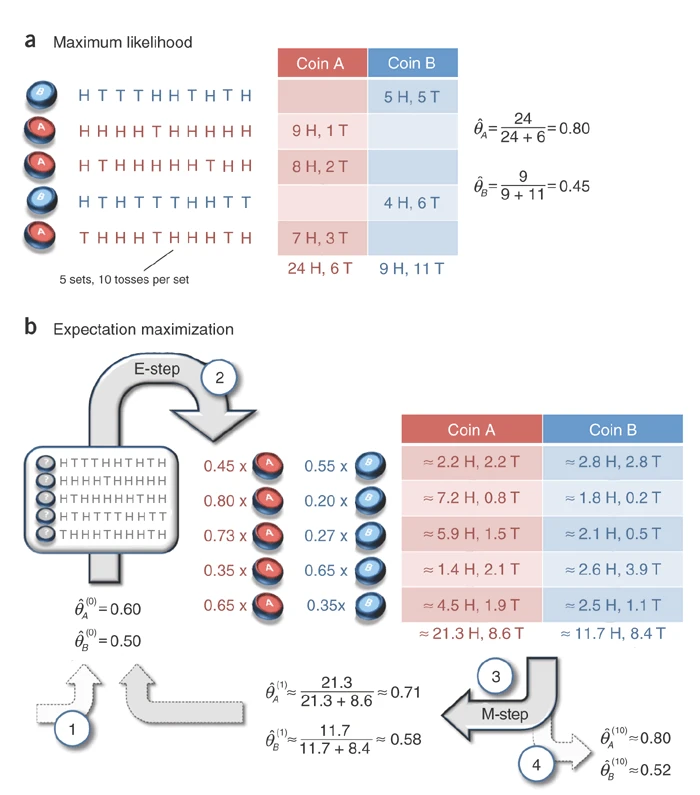

(a) Maximum likelihood estimation. For each set of ten tosses, the maximum likelihood procedure accumulates the counts of heads and tails for coins A and B separately. These counts are then used to estimate the coin biases. (b) Expectation maximization. 1. EM starts with an initial guess of the parameters. 2. In the E-step, a probability distribution over possible completions is computed using the current parameters. The counts shown in the table are the expected numbers of heads and tails according to this distribution. 3. In the M-step, new parameters are determined using the current completions. 4. After several repetitions of the E-step and M-step, the algorithm converges.

- assume $\theta_A=0.6, \theta_B=0.5$
- 1st toss: 5H 5T
    - $P_A=\frac{0.6^5+(1-0.4)^5}{0.6^5+(1-0.4)^5+0.5^5+(1-0.5)^5}=0.45$
    - $P_B=\frac{0.5^5+(1-0.5)^5}{0.6^5+(1-0.4)^5+0.5^5+(1-0.5)^5}=0.55$
- 2nd toss ...

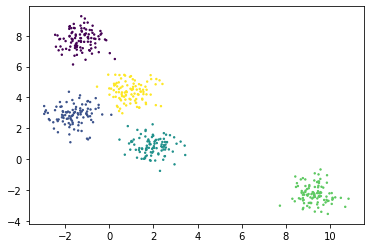

In [69]:
# K-means algorithm

from sklearn.metrics import pairwise_distances_argmin
import numpy as np

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 5)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=2);

## Caveats of expectation–maximization

1. The globally optimal result may not be achieved
2. number of clusters must be known
3. linear cluster boundaries
- Kernelized K-means: One version of this kernelized k-means is implemented in Scikit-Learn within the SpectralClustering estimator. It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm.


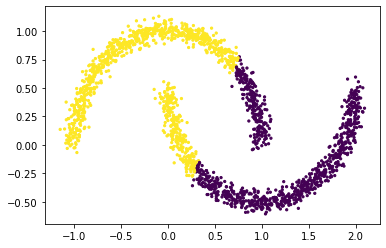

In [76]:
from sklearn.datasets import make_moons
X, y = make_moons(2000, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5);

/Users/minchen/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


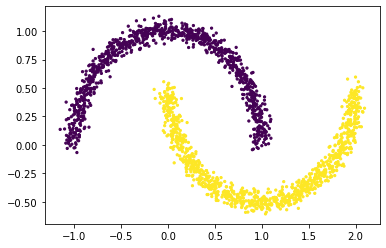

In [77]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, 
                           affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5);

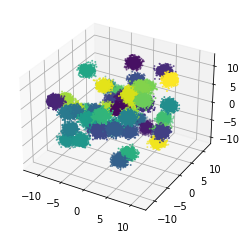

In [44]:
from sklearn.datasets import make_blobs
from mpl_toolkits import mplot3d

import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=50000, 
                  n_features=3,
                  centers=50,
                  cluster_std=0.60,
                  random_state=0)

ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:,2], c=y, s=1);

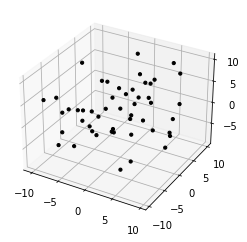

In [50]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=50)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

ax = plt.subplot(projection='3d')
centers = kmeans.cluster_centers_
ax.scatter3D(centers[:, 0], centers[:, 1], centers[:,2], c='black', s=10, alpha=1);

#### Example: Image classification

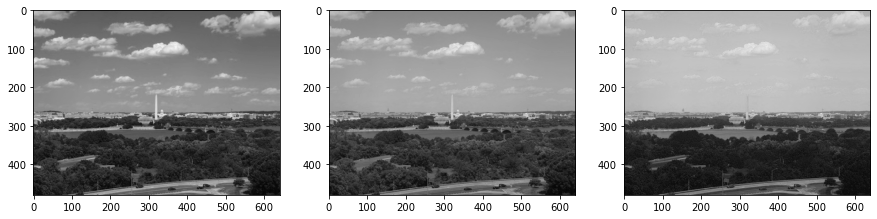

In [150]:
import matplotlib.image as mpimg
img = mpimg.imread('nationalcapital_2017_06_02_150108.jpeg')

a,b,c=img.shape
X = np.empty((a*b,3))
fig, ax = plt.subplots(1,3,figsize=(15,5))
for i in np.arange(0,3):
    ax[i].imshow(img[:,:,i], cmap='gray')
    X[:,i]=img[:,:,i].flatten()

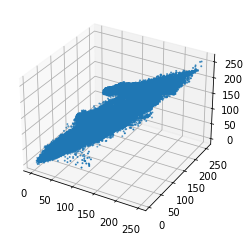

In [119]:
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:,0], X[:, 1], X[:,2], s=1);

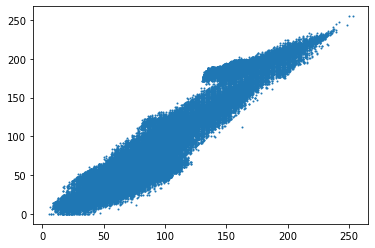

In [121]:
plt.scatter(X[:, 1], X[:, 2], s=1);

In [137]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

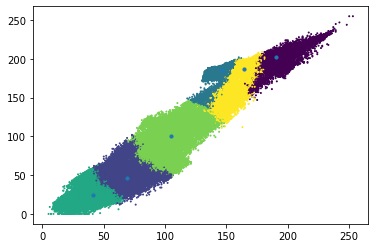

In [135]:
plt.scatter(X[:, 1], X[:, 2], s=1, c=y_kmeans);
plt.scatter(centers[:, 1], centers[:, 2], s=10);

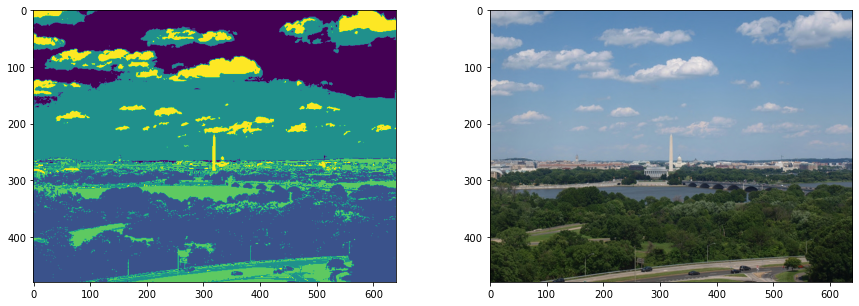

In [139]:
yimg = np.reshape(y_kmeans, (a,b))

fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].imshow(yimg)
ax[1].imshow(img)

/var/folders/cq/d8h3wnqx5yd2tjl34nkmynr80000gn/T/ipykernel_54126/1251715718.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  B2 = B2.astype(np.float)
/var/folders/cq/d8h3wnqx5yd2tjl34nkmynr80000gn/T/ipykernel_54126/1251715718.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  B3 = B3.astype(np.float)
/var/folders/cq/d8h3wnqx5yd2tjl34n

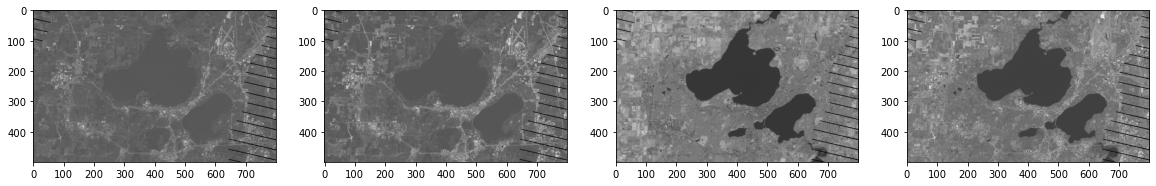

In [181]:
import matplotlib.image as mpimg
B2 = mpimg.imread('LE07_L2SP_024030_20100826_20200910_02_T1_SR_B2.tif')
B2 = B2.astype(np.float)
B2[B2==B2.max()]=0

B3 = mpimg.imread('LE07_L2SP_024030_20100826_20200910_02_T1_SR_B3.tif')
B3 = B3.astype(np.float)
B3[B3==B3.max()]=0

B4 = mpimg.imread('LE07_L2SP_024030_20100826_20200910_02_T1_SR_B4.tif')
B4 = B4.astype(np.float)
B4[B4==B4.max()]=0

B5 = mpimg.imread('LE07_L2SP_024030_20100826_20200910_02_T1_SR_B5.tif')
B5 = B5.astype(np.float)
B5[B5==B5.max()]=0

x1=3800
x2=4300
y1=3700
y2=4500

B2 = B2[x1:x2,y1:y2]
B3 = B3[x1:x2,y1:y2]
B4 = B4[x1:x2,y1:y2]
B5 = B5[x1:x2,y1:y2]

fig, ax = plt.subplots(1,4,figsize=(20,5))
ax[0].imshow(B2, cmap='gray')
ax[1].imshow(B3, cmap='gray')
ax[2].imshow(B4, cmap='gray')
ax[3].imshow(B5, cmap='gray')


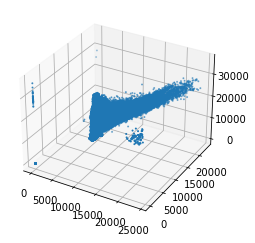

In [182]:
a,b = B2.shape
X = np.empty((a*b,3))
X[:,0]=B2.flatten()
X[:,1]=B3.flatten()
X[:,2]=B4.flatten()

ax = plt.subplot(projection='3d')
ax.scatter3D(X[:,0], X[:, 1], X[:,2], s=1);

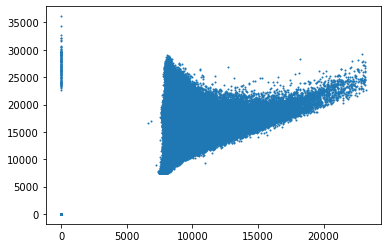

In [183]:
plt.scatter(X[:, 1], X[:, 2], s=1);

In [189]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

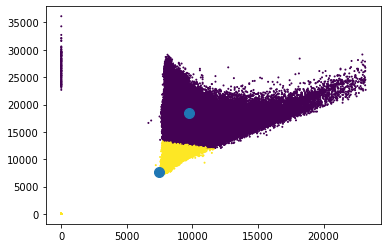

In [190]:
plt.scatter(X[:, 1], X[:, 2], s=1, c=y_kmeans);
plt.scatter(centers[:, 1], centers[:, 2], s=100);

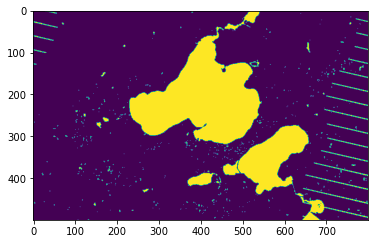

In [191]:
yimg = np.reshape(y_kmeans, (a,b))
plt.imshow(yimg)